# 27-01-25

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
import re
from nltk.corpus import stopwords
def clean(review):
    review=review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review="".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

C:\Users\K HARSHINI DEVI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\K HARSHINI
[nltk_data]     DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df['Review']=df['Review'].apply(clean)
df.head()

,Review,Rating,Review_lists
0,nicehotelexpensiveparkinggotgooddealstayhotela...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,oknothingspecialchargediamondmemberhiltondecid...,2,"[ok, nothing, special, charge, diamond, member..."
2,nicerooms4experiencehotelmonacoseattlegoodhote...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,uniquegreatstaywonderfultimehotelmonacolocatio...,5,"[unique,, great, stay,, wonderful, time, hotel..."
4,greatstaygreatstaywentseahawkgameawesomedownfa...,5,"[great, stay, great, stay,, went, seahawk, gam..."


In [7]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [8]:
def corpus(text):
    text_list=text.split()
    return text_list

In [9]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay,, went, seahawk, gam..."


In [11]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 57301.76it/s]


2138765

In [13]:
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [15]:
words=[]
freq=[]
for word,count in mostCommon:
    words.append(word)
    freq.append(count)

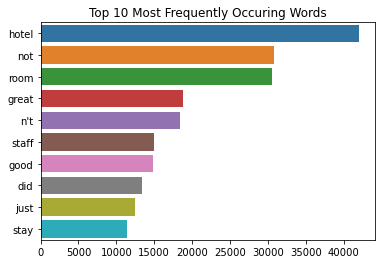

In [16]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['Review'])

In [19]:
count_values=bigrams.toarray().sum(axis=0)
ngram_freq=pd.DataFrame(sorted([(count_values[i],k) for k, i in cv.vocabulary_.items()],
                              reverse=True))
ngram_freq.columns=['frequency','ngram']

In [ ]:
import seaborn as sns
sns.barplot(x=ngram_freq['frequency'][:10],y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

# 28-01-25

In [2]:
doc_trump="Mr.Trump became president after winnig the political elections. Thought he lost the support of some republic friends, Trump is friends with president Putin"
doc_election="President says putin  has no political interference is the election outcome He says it was a Wichhut by political parties.He claimed president putin is a friend who had nothing to do with the elections"
doc_putin="Post elections, Vladimir putin became President of Russia.President Putin had served as the prime minister earlier in his political career"
documents=[doc_trump,doc_election,doc_putin]

In [3]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,thought,to,trump,vladimir,was,who,wichhut,winnig,with
doc_trump,1,0,1,0,0,0,0,0,0,1,...,2,1,0,2,0,0,0,0,1,1
doc_election,0,0,0,1,0,1,1,0,1,1,...,2,0,1,0,0,1,1,1,0,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


# 29-01-25 

In [2]:
A={1,2,3,4,6}
B={1,2,5,8,9}
C=A.intersection(B)
D=A.union(B)
print('AnB = ',C)
print('AUB = ',D)
print('J(A,B)= ',float(len(C))/float(len(D)))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B)=  0.25


In [3]:
def jaccard_similarity(set1,set2):
    intersection=len(set1.intersection(set2))
    union=len(set1.union(set2))
    return intersection/union
set_a={"Language","for","computer","NLP","science"}
set_b={"NLP","for","Language","data","ML","AI"}
similarity=jaccard_similarity(set_a,set_b)
print("Jaccard Similarity: ",similarity)

Jaccard Similarity:  0.375


In [5]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
]

In [9]:
user_input="How can I track my order?"

In [10]:
vectorizer=TfidfVectorizer(stop_words='english')
all_texts=responses+[user_input]

In [12]:
tfidf_matrix=vectorizer.fit_transform(all_texts)

In [13]:
user_vector=tfidf_matrix[-1]
response_vectors=tfidf_matrix[:-1]
cosine_similarities=cosine_similarity(user_vector,response_vectors)

In [14]:
most_similar_idx=np.argmax(cosine_similarities)

In [15]:
print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most relevant response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


# 30-01-25

In [1]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn .metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk

In [3]:
nltk.download('popular',quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error downloading 'omw-1.4' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/omw-1.4.zip>:   [WinError
[nltk_data]     10053] An established connection was aborted by the
[nltk_data]     software in your host machine
[nltk_data] Downloading package punkt to C:\Users\K HARSHINI
[nltk_data]     DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\K HARSHINI
[nltk_data]     DEVI\AppData\Roaming\nltk_data...


True

In [6]:
f=open(r"C:\Users\K HARSHINI DEVI\OneDrive\Desktop\input.txt",'r',errors='ignore')
raw=f.read()
raw=raw.lower()

In [7]:
sent_tokens=nltk.sent_tokenize(raw)
word_tokens=nltk.word_tokenize(raw)

In [8]:
lemmer=nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict=dict((ord(punct),None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [15]:
GREETINGS_INPUTS=("hello","hi","greetings","whatsup","hey",\
                  "how are you?")
GREETING_RESPONSES=["hi","hey","hi there","hello",\
                    "I am glad! you are talking to me",\
                    "i am fine! how about yoo"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [16]:
flag=True
print("SABot: My name is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True):
    user_response=input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag=False
            print("SABot: You are welcome...")
        else:
            if(greeting(user_response)!=None):
                print("SABot: "+greeting(user_response))
            else:
                print("SABot: ",end=" ")

SABot: My name is SABot. How can I assist you?. If you want to exit, type Bye!
hello


NameError: name 'GREETING_INPUTS' is not defined

# 31-01-25

In [1]:
sent="Rani is studying at MallaReddy University in Hyderabad, India"

In [6]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\K
[nltk_data]     HARSHINI DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to C:\Users\K HARSHINI
[nltk_data]     DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [10]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to C:\Users\K
[nltk_data]     HARSHINI DEVI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.


True

In [8]:
!pip install svgling

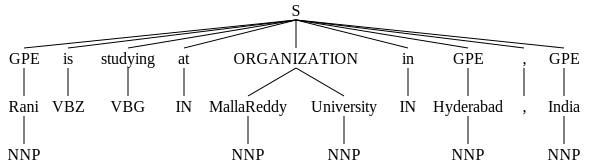

In [11]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

In [12]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth $10000 in New York time square')
for ent in doc.ents:
    print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New York 51 59 GPE


In [13]:
nlp=spacy.load("en_core_web_sm")

In [14]:
text="""
Elon Musk, the CEO of SpaceX and Tesla, announced that SpaceX's Starship will be launching its first crewed mission to Mars in 2027.
The mission, which will involve astronauts from NASA, will be the first of its kind and it will take place at Kennedy Space Center in Florida.
Musk emphasized that the project would push the boundaries of space exploration.
"""

In [15]:
doc=nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Elon Musk, Label: PERSON
Entity: Tesla, Label: ORG
Entity: SpaceX, Label: PERSON
Entity: Starship, Label: PRODUCT
Entity: first, Label: ORDINAL
Entity: Mars, Label: LOC
Entity: 2027, Label: DATE
Entity: NASA, Label: ORG
Entity: first, Label: ORDINAL
Entity: Kennedy Space Center, Label: FAC
Entity: Florida, Label: GPE


In [16]:
from spacy import displacy
displacy.render(doc, style="ent")

In [19]:
import pandas as pd
entities=[(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df=pd.DataFrame(entities, columns=['text','type','lemma'])
print(df)

                    text     type                 lemma
0              Elon Musk   PERSON             Elon Musk
1                  Tesla      ORG                 Tesla
2                 SpaceX   PERSON                SpaceX
3               Starship  PRODUCT              Starship
4                  first  ORDINAL                 first
5                   Mars      LOC                  Mars
6                   2027     DATE                  2027
7                   NASA      ORG                  NASA
8                  first  ORDINAL                 first
9   Kennedy Space Center      FAC  Kennedy Space Center
10               Florida      GPE               Florida
